## Go through the telco dataset and build necessary functions to prepare the data
> - [x] Explore types and samples of data
> - [x] Determine how each column should be formatted
> - [x] Determine columns with data to be transformed
> - [x] Determine columns to be merged
> - [x] Determine columns to be dropped
> - [x] Reformat column datatypes as appropriate
> - [x] Create function(s) to do everything
> - [x] Create prepare.py file with function

Are there any variables that may potentially be more related to churn than others? What are they?

In [2]:
# import libraries
import acquire
import pandas as pd
import numpy as np

from scipy import stats

In [3]:
# import data
df = acquire.get_telco_data()

Reading from file...


In [4]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
# explore types and samples
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,6768,6292,7007,4309,4787
payment_type_id,4,int64,0,1,1,1,1,4
internet_service_type_id,3,int64,0,1,2,2,2,2
contract_type_id,3,int64,0,3,1,1,1,2
customer_id,7043,object,0,9610-WCESF,8903-WMRNW,9940-RHLFB,6077-BDPXA,6732-FZUGP
gender,2,object,0,Male,Female,Female,Female,Female
senior_citizen,2,int64,0,0,0,0,0,0
partner,2,object,0,No,Yes,No,No,No
dependents,2,object,0,No,No,No,No,No
tenure,73,int64,0,67,15,1,3,47
phone_service,2,object,0,No,Yes,Yes,Yes,Yes


In [6]:
# extract the columns
# [print(f'- {col}: ') for col in df.columns]

### Do nothing
- customer_id: do nothing
- gender: do nothing
- partner: do nothing
- dependents: do nothing
- churn: do nothing
- monthly_charges: do nothing
---
### Change
- [x] senior_citizen: change to yes/no
- [x] total_charges: Object but int values??
- [x] internet_service_type: has bad nulls! 
---
### Group together
- [x] phone_service: combine with multiple_lines
- [x] multiple_lines: combine with phone_service
- [x] online_security: part of internet service
- [x] online_backup: part of internet service
- [x] device_protection: part of internet service
- [x] tech_support: part of internet service
- [x] streaming_tv: part of internet service
- [x] streaming_movies: part of internet service
---
### Questionable columns
- paperless_billing: Any relation to payment_type?
- contract_type: relation to tenure?
- payment_type: Anything to be done with this?
- tenure: what does this measure? get more specific
    - A: it's on a month by month basis
---
### Drop
- [x] payment_type_id: drop
- [x] internet_service_type_id: drop
- [x] contract_type_id: drop

In [8]:
# Determine column formatting
df.senior_citizen = df.senior_citizen.map({0:'No',1:'Yes'})
df.senior_citizen

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: senior_citizen, Length: 7043, dtype: object

In [9]:
acquire.df_info(df)

,nunique,dtypes,isnull,4237
payment_type_id,4,int64,0,3
internet_service_type_id,3,int64,0,1
contract_type_id,3,int64,0,3
customer_id,7043,object,0,5980-BDHPY
gender,2,object,0,Male
senior_citizen,2,object,0,No
partner,2,object,0,Yes
dependents,2,object,0,No
tenure,73,int64,0,72
phone_service,2,object,0,Yes


In [10]:
df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [11]:
# find out what's going on with total_charges
# What is total_charges based off?
# df.total_charges/df.monthly_charges # renders an error

df.total_charges.sample().index

Index([1136], dtype='int64')

In [12]:
sample = df.iloc[df.total_charges.sample().index][['tenure','monthly_charges','total_charges']]
sample

,tenure,monthly_charges,total_charges
2407,4,55.5,227.35


In [13]:
round(sample.total_charges.astype(float) / sample.monthly_charges)

2407    4.0
dtype: float64

In [14]:
# tenure looks to be on a monthly basis
# How does it relate to the voids in total_charges?
df.tenure.nsmallest()

945     0
1731    0
1906    0
2025    0
2176    0
Name: tenure, dtype: int64

In [15]:
# apply mask to look at 0 tenure
df[df.tenure == 0][['tenure','monthly_charges','total_charges']]

,tenure,monthly_charges,total_charges
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


In [16]:
# let's fix that up
df.total_charges = df.total_charges.replace(' ',0).astype(float)
df.total_charges.dtypes

dtype('float64')

In [17]:
acquire.df_info(df)

,nunique,dtypes,isnull,5565
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,1
customer_id,7043,object,0,7839-QRKXN
gender,2,object,0,Female
senior_citizen,2,object,0,No
partner,2,object,0,No
dependents,2,object,0,No
tenure,73,int64,0,1
phone_service,2,object,0,Yes


<Axes: >

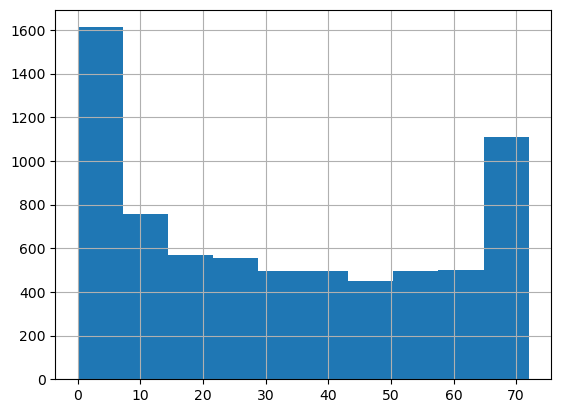

In [18]:
# see the distribution of tenure
df.tenure.hist()

In [19]:
# Next let's look at internet service types (handle those nulls)
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,3172,5794,1191,1738,6397
payment_type_id,4,int64,0,1,1,2,3,4
internet_service_type_id,3,int64,0,2,1,3,2,1
contract_type_id,3,int64,0,1,1,2,3,2
customer_id,7043,object,0,4548-SDBKE,8158-WPEZG,1755-FZQEC,2530-ENDWQ,9060-HJJRW
gender,2,object,0,Female,Male,Male,Female,Female
senior_citizen,2,object,0,No,No,No,No,No
partner,2,object,0,No,No,No,Yes,No
dependents,2,object,0,No,No,No,No,No
tenure,73,int64,0,5,11,39,71,51
phone_service,2,object,0,Yes,No,Yes,Yes,No


In [20]:
# Anyone with 'no internet service' has 'NaN' in the column
# Let's fix that
df.internet_service_type = df.internet_service_type.fillna('None')
df.internet_service_type.value_counts()

internet_service_type
Fiber optic    3096
DSL            2421
None           1526
Name: count, dtype: int64

In [21]:
# re-examine data
acquire.df_info(df)

,nunique,dtypes,isnull,4646
payment_type_id,4,int64,0,1
internet_service_type_id,3,int64,0,2
contract_type_id,3,int64,0,3
customer_id,7043,object,0,6556-DBKZF
gender,2,object,0,Female
senior_citizen,2,object,0,No
partner,2,object,0,Yes
dependents,2,object,0,Yes
tenure,73,int64,0,71
phone_service,2,object,0,Yes


In [22]:
# combine some columns
# look at phone services, they look connected
df.phone_service.value_counts()

phone_service
Yes    6361
No      682
Name: count, dtype: int64

In [23]:
df.multiple_lines.value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [24]:
df['phone_lines'] = np.select(
        [
        (df['multiple_lines'] == 'No') & (df['phone_service'] == 'Yes'),
        (df['multiple_lines'] == 'Yes')
        ],
        ['Single', 'Multiple'],
        default='No phone service'
    )
df.phone_lines

0                 Single
1               Multiple
2                 Single
3                 Single
4                 Single
              ...       
7038              Single
7039            Multiple
7040              Single
7041              Single
7042    No phone service
Name: phone_lines, Length: 7043, dtype: object

In [25]:
df = df.drop(columns=['phone_service','multiple_lines'])

In [26]:
acquire.df_info(df)

,nunique,dtypes,isnull,6337
payment_type_id,4,int64,0,2
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,1
customer_id,7043,object,0,8974-OVACP
gender,2,object,0,Female
senior_citizen,2,object,0,No
partner,2,object,0,No
dependents,2,object,0,No
tenure,73,int64,0,1
online_security,3,object,0,No internet service


In [27]:
# let's combine streaming services
df['streaming'] = np.select(
        [
        (df['streaming_movies'] == 'Yes') & (df['streaming_tv'] == 'Yes'),
        (df['streaming_movies'] == 'No') & (df['streaming_tv'] == 'No'),
        (df['streaming_movies'] == 'Yes'),
        (df['streaming_tv'] == 'Yes')
        ],
        ['Both', 'Neither', 'Movies', 'TV'],
        default='No internet service'
    )

In [28]:
df = df.drop(columns=['streaming_movies','streaming_tv'])

In [29]:
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,5027,2757,515,5290,6681
payment_type_id,4,int64,0,2,3,1,3,1
internet_service_type_id,3,int64,0,1,1,1,1,2
contract_type_id,3,int64,0,1,1,1,1,1
customer_id,7043,object,0,7065-YUNRY,3926-CUQZX,0749-IRGQE,7470-MCQTK,9497-QCMMS
gender,2,object,0,Female,Male,Female,Female,Male
senior_citizen,2,object,0,No,No,Yes,No,Yes
partner,2,object,0,No,No,Yes,Yes,No
dependents,2,object,0,No,No,No,No,No
tenure,73,int64,0,1,1,13,13,1
online_security,3,object,0,No,No,No,No,No


In [30]:
df[['online_security','online_backup','device_protection','tech_support']].nunique()

online_security      3
online_backup        3
device_protection    3
tech_support         3
dtype: int64

In [31]:
df['security'] = np.select(
        [
        (df['online_security'] == 'Yes') & (df['device_protection'] == 'Yes'),
        (df['online_security'] == 'No') & (df['device_protection'] == 'No'),
        (df['online_security'] == 'Yes'),
        (df['device_protection'] == 'Yes')
        ],
        ['Both', 'Neither', 'Security', 'Protection'],
        default='No internet service'
    )

In [32]:
df = df.drop(columns=['online_security','device_protection'])

In [33]:
df['support'] = np.select(
        [
        (df['tech_support'] == 'Yes') & (df['online_backup'] == 'Yes'),
        (df['tech_support'] == 'No') & (df['online_backup'] == 'No'),
        (df['tech_support'] == 'Yes'),
        (df['online_backup'] == 'Yes')
        ],
        ['Both', 'Neither', 'Tech Support', 'Online Backup'],
        default='No internet service'
    )

In [34]:
df = df.drop(columns=['tech_support','online_backup'])

In [35]:
acquire.df_info(df)

,nunique,dtypes,isnull,290
payment_type_id,4,int64,0,3
internet_service_type_id,3,int64,0,3
contract_type_id,3,int64,0,2
customer_id,7043,object,0,0428-AXXLJ
gender,2,object,0,Male
senior_citizen,2,object,0,No
partner,2,object,0,No
dependents,2,object,0,No
tenure,73,int64,0,25
paperless_billing,2,object,0,Yes


In [36]:
df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])

In [37]:
acquire.df_info(df,samples=5)

,nunique,dtypes,isnull,5441,6447,5020,3214,6508
customer_id,7043,object,0,7661-CPURM,9128-CPXKI,7055-HNEOJ,4611-ANLQC,9231-ZJYAM
gender,2,object,0,Male,Female,Male,Female,Female
senior_citizen,2,object,0,No,No,No,No,Yes
partner,2,object,0,No,No,Yes,Yes,No
dependents,2,object,0,No,No,No,No,No
tenure,73,int64,0,19,59,3,60,4
paperless_billing,2,object,0,Yes,No,Yes,No,Yes
monthly_charges,1585,float64,0,87.7,95.8,55.8,50.05,78.85
total_charges,6531,float64,0,1725.95,5655.45,154.55,2911.5,292.8
churn,2,object,0,No,No,No,No,Yes


In [38]:
# adjust column names
df = df.rename(columns={
    'partner':'married',
    'dependents':'children',
    'tenure':'tenure_months'
})

In [39]:
acquire.df_info(df)

,nunique,dtypes,isnull,1286
customer_id,7043,object,0,1915-IOFGU
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,1
paperless_billing,2,object,0,No
monthly_charges,1585,float64,0,70.5
total_charges,6531,float64,0,70.5
churn,2,object,0,Yes


In [40]:
df = df.set_index('customer_id')

In [41]:
acquire.df_info(df)

,nunique,dtypes,isnull,4484-CGXFK
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,No
children,2,object,0,No
tenure_months,73,int64,0,3
paperless_billing,2,object,0,Yes
monthly_charges,1585,float64,0,55.3
total_charges,6531,float64,0,196.15
churn,2,object,0,Yes
contract_type,3,object,0,Month-to-month


In [42]:
# create function to prepare the data
def prep_telco(df):
    """
    Cleaning function to handle raw Telco dataset. Takes one argument (Telco Dataframe) and returns a cleaned and processed dataset.
    """
    drop_columns = [
        'phone_service',
        'multiple_lines',
        'streaming_movies',
        'streaming_tv',
        'payment_type_id',
        'internet_service_type_id',
        'contract_type_id',
        'online_security',
        'device_protection',
        'tech_support',
        'online_backup'
    ]
    
    # transform data
    df.senior_citizen = df.senior_citizen.map({0:'No',1:'Yes'})
    df.total_charges = df.total_charges.replace(' ',0).astype(float)
    df.internet_service_type = df.internet_service_type.fillna('None')
    df = df.set_index('customer_id')
    
    # combine columns
    df['streaming'] = np.select(
        [
        (df['streaming_movies'] == 'Yes') & (df['streaming_tv'] == 'Yes'),
        (df['streaming_movies'] == 'No') & (df['streaming_tv'] == 'No'),
        (df['streaming_movies'] == 'Yes'),
        (df['streaming_tv'] == 'Yes')
        ],
        ['Both', 'Neither', 'Movies', 'TV'],
        default='No internet service'
    )
    
    df['phone_lines'] = np.select(
        [
        (df['multiple_lines'] == 'No') & (df['phone_service'] == 'Yes'),
        (df['multiple_lines'] == 'Yes')
        ],
        ['Single', 'Multiple'],
        default='No phone service'
    )
    
    df['protection'] = np.select(
        [
        (df['online_security'] == 'Yes') & (df['device_protection'] == 'Yes'),
        (df['online_security'] == 'No') & (df['device_protection'] == 'No'),
        (df['online_security'] == 'Yes'),
        (df['device_protection'] == 'Yes')
        ],
        ['Both', 'Neither', 'Online Security', 'Device Protection'],
        default='No internet service'
    )
    
    df['support'] = np.select(
        [
        (df['tech_support'] == 'Yes') & (df['online_backup'] == 'Yes'),
        (df['tech_support'] == 'No') & (df['online_backup'] == 'No'),
        (df['tech_support'] == 'Yes'),
        (df['online_backup'] == 'Yes')
        ],
        ['Both', 'Neither', 'Tech Support', 'Online Backup'],
        default='No internet service'
    )
    
    # adjust column names
    df = df.rename(columns={
        'partner':'married',
        'dependents':'children',
        'tenure':'tenure_months'
    })
    
    # drop columns
    df = df.drop(columns=drop_columns)
    
    return df

In [43]:
# test the function
raw_df = acquire.get_telco_data()
raw_df.head()

Reading from file...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [44]:
df = prep_telco(raw_df)
df.head()

,gender,senior_citizen,married,children,tenure_months,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,streaming,phone_lines,protection,support
customer_id,,,,,,,,,,,,,,,,
0002-ORFBO,Female,No,Yes,Yes,9,Yes,65.6,593.30,No,One year,DSL,Mailed check,TV,Single,Neither,Both
0003-MKNFE,Male,No,No,No,9,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,Movies,Multiple,Neither,Neither
0004-TLHLJ,Male,No,No,No,4,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Device Protection,Neither
0011-IGKFF,Male,Yes,Yes,No,13,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,Both,Single,Device Protection,Online Backup
0013-EXCHZ,Female,Yes,Yes,No,3,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,TV,Single,Neither,Tech Support


In [45]:
acquire.df_info(df)

,nunique,dtypes,isnull,9802-CAQUT
gender,2,object,0,Female
senior_citizen,2,object,0,No
married,2,object,0,Yes
children,2,object,0,Yes
tenure_months,73,int64,0,72
paperless_billing,2,object,0,No
monthly_charges,1585,float64,0,109.55
total_charges,6531,float64,0,7887.25
churn,2,object,0,No
contract_type,3,object,0,Two year


> I want to make an even more refined set, so let's make a function to drop anything that may have an extremely low impact.

In [47]:
# grab object columns
obj_cols = []

for col in df.columns:
    if df[col].dtype == 'O':
        # print(f'{col}: object')
        obj_cols.append(col)

obj_cols

['gender',
 'senior_citizen',
 'married',
 'children',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'streaming',
 'phone_lines',
 'protection',
 'support']

In [48]:
# lets run a quick stats test
# only doing categoricals, so chi-squared
# test run on single column against churn

alpha = 0.05

In [49]:
observed = pd.crosstab(df.churn,df['gender'])

t,p,dof,expected = stats.chi2_contingency(observed)

In [50]:
if p < alpha:
    print('reject')
else:
    print('fail to reject')
    print(p)

fail to reject
0.48657873605618596


In [51]:
corr_dict = {}

for col in obj_cols:
    observed = pd.crosstab(df.churn,df[col])
    # print(observed)
    
    t,p,dof,expected = stats.chi2_contingency(observed)
    
    # if p < alpha:
        # print(f'{col} has potential correlation with churn at {p}')
    corr_dict[col] = p

corr_dict

{'gender': 0.48657873605618596,
 'senior_citizen': 1.510066805092378e-36,
 'married': 2.1399113440759935e-36,
 'children': 4.9249216612154196e-43,
 'paperless_billing': 4.073354668665985e-58,
 'churn': 0.0,
 'contract_type': 5.863038300673391e-258,
 'internet_service_type': 9.571788222840544e-160,
 'payment_type': 3.6823546520097993e-140,
 'streaming': 1.101744750913995e-80,
 'phone_lines': 0.0034643829548773,
 'protection': 3.4158528587144625e-206,
 'support': 3.6537570765082944e-208}

In [52]:
sorted(corr_dict,key=corr_dict.get)

['churn',
 'contract_type',
 'support',
 'protection',
 'internet_service_type',
 'payment_type',
 'streaming',
 'paperless_billing',
 'children',
 'senior_citizen',
 'married',
 'phone_lines',
 'gender']

In [53]:
drop_extras = sorted(corr_dict, key=corr_dict.get)[:]
drop_extras

['churn',
 'contract_type',
 'support',
 'protection',
 'internet_service_type',
 'payment_type',
 'streaming',
 'paperless_billing',
 'children',
 'senior_citizen',
 'married',
 'phone_lines',
 'gender']

In [54]:
df.drop(columns=drop_extras)

,tenure_months,monthly_charges,total_charges
customer_id,,,
0002-ORFBO,9,65.60,593.30
0003-MKNFE,9,59.90,542.40
0004-TLHLJ,4,73.90,280.85
0011-IGKFF,13,98.00,1237.85
0013-EXCHZ,3,83.90,267.40
...,...,...,...
9987-LUTYD,13,55.15,742.90
9992-RRAMN,22,85.10,1873.70
9992-UJOEL,2,50.30,92.75


In [55]:
def drop_extras(df,degree=6):
    """
    Function to drop extra columns that may have a smaller impact on the model. Requires dataframe be cleaned first.
    
    Takes a DataFrame, and returns a DataFrame.
    
    Degree indicates the index of object columns to begin selecting for drop off.
        Hint: smaller value means drop more columns, larger value means drop fewer columns!
    """
    from scipy import stats
    
    corr_dict = {}
    obj_cols = []
    alpha = 0.05
    
    # grab object columns from dataframe
    for col in df.columns:
        if df[col].dtype == 'O':
            # print(f'{col}: object')
            obj_cols.append(col)
    
    # get p-values of columns
    for col in obj_cols:
        observed = pd.crosstab(df.churn,df[col])
        # print(observed)

        t,p,dof,expected = stats.chi2_contingency(observed)

        # if p < alpha:
            # print(f'{col} has potential correlation with churn at {p}')
        corr_dict[col] = p
            
    
    # grabs 
    drop_extra = sorted(corr_dict, key=corr_dict.get)[degree:]
    
    df = df.drop(columns=drop_extra)
    
    return df

In [56]:
df = acquire.get_telco_data()

Reading from file...


In [57]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [58]:
df = prep_telco(df)

In [59]:
df.head()

,gender,senior_citizen,married,children,tenure_months,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,streaming,phone_lines,protection,support
customer_id,,,,,,,,,,,,,,,,
0002-ORFBO,Female,No,Yes,Yes,9,Yes,65.6,593.30,No,One year,DSL,Mailed check,TV,Single,Neither,Both
0003-MKNFE,Male,No,No,No,9,No,59.9,542.40,No,Month-to-month,DSL,Mailed check,Movies,Multiple,Neither,Neither
0004-TLHLJ,Male,No,No,No,4,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Device Protection,Neither
0011-IGKFF,Male,Yes,Yes,No,13,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,Both,Single,Device Protection,Online Backup
0013-EXCHZ,Female,Yes,Yes,No,3,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check,TV,Single,Neither,Tech Support


In [60]:
drop_extras(df)

,tenure_months,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,protection,support
customer_id,,,,,,,,,
0002-ORFBO,9,65.60,593.30,No,One year,DSL,Mailed check,Neither,Both
0003-MKNFE,9,59.90,542.40,No,Month-to-month,DSL,Mailed check,Neither,Neither
0004-TLHLJ,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,Device Protection,Neither
0011-IGKFF,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,Device Protection,Online Backup
0013-EXCHZ,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,Neither,Tech Support
...,...,...,...,...,...,...,...,...,...
9987-LUTYD,13,55.15,742.90,No,One year,DSL,Mailed check,Online Security,Tech Support
9992-RRAMN,22,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Neither
9992-UJOEL,2,50.30,92.75,No,Month-to-month,DSL,Mailed check,Neither,Online Backup


> I need to make a split function. For this, I'm going to pull in my function that I had built previously from the classification exercises

In [62]:
from sklearn.model_selection import train_test_split

# Split given database
def split_df(df,strat_var,seed=123):
    """
    Returns three dataframes split from one for use in model training, validation, and testing. Takes two arguments:
        df: any dataframe to be split
        strat_var: the value to stratify on. This value should be a categorical variable.
    
    Function performs two splits, first to primarily make the training set, and the second to make the validate and test sets.
    """
    # Run first split
    train, validate_test = train_test_split(df,
                 train_size=0.60,
                random_state=seed,
                 stratify=df[strat_var]
                )
    
    # Run second split
    validate, test = train_test_split(validate_test,
                test_size=0.50,
                 random_state=seed,
                 stratify=validate_test[strat_var]
                )
    
    return train, validate, test

In [63]:
train,validate,test = split_df(df,'churn')
train

,gender,senior_citizen,married,children,tenure_months,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,streaming,phone_lines,protection,support
customer_id,,,,,,,,,,,,,,,,
4083-BFNYK,Female,Yes,Yes,No,38,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic),Movies,Multiple,Online Security,Online Backup
5804-LEPIM,Female,Yes,No,No,2,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Neither,Neither
4895-TMWIR,Male,Yes,Yes,No,11,No,19.95,214.75,Yes,Month-to-month,None,Mailed check,No internet service,Single,No internet service,No internet service
1342-JPNKI,Male,No,No,No,10,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic),TV,Multiple,Neither,Neither
3397-AVTKU,Male,No,No,No,43,Yes,60.00,2548.55,No,Two year,DSL,Electronic check,Movies,Single,Neither,Online Backup
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915-IOFGU,Female,No,No,No,1,No,70.50,70.50,Yes,Month-to-month,Fiber optic,Electronic check,Neither,Single,Neither,Neither
7025-WCBNE,Male,Yes,No,No,47,No,59.60,2754.00,No,Two year,DSL,Bank transfer (automatic),Neither,Multiple,Neither,Both
9788-HNGUT,Male,No,Yes,No,72,Yes,116.95,8594.40,No,Two year,Fiber optic,Credit card (automatic),Both,Multiple,Both,Both


In [64]:
# write contents to .py file
write_contents = [
    '''
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
    ''',
    '''
# create function to prepare the data
def prep_telco(df):
    """
    Cleaning function to handle raw Telco dataset. Takes one argument (Telco Dataframe) and returns a cleaned and processed dataset.
    """
    drop_columns = [
        'phone_service',
        'multiple_lines',
        'streaming_movies',
        'streaming_tv',
        'payment_type_id',
        'internet_service_type_id',
        'contract_type_id',
        'online_security',
        'device_protection',
        'tech_support',
        'online_backup'
    ]
    
    # transform data
    df.senior_citizen = df.senior_citizen.map({0:'No',1:'Yes'})
    df.total_charges = df.total_charges.replace(' ',0).astype(float)
    df.internet_service_type = df.internet_service_type.fillna('None')
    df = df.set_index('customer_id')
    
    # combine columns
    df['streaming'] = np.select(
        [
        (df['streaming_movies'] == 'Yes') & (df['streaming_tv'] == 'Yes'),
        (df['streaming_movies'] == 'No') & (df['streaming_tv'] == 'No'),
        (df['streaming_movies'] == 'Yes'),
        (df['streaming_tv'] == 'Yes')
        ],
        ['Both', 'Neither', 'Movies', 'TV'],
        default='No internet service'
    )
    
    df['phone_lines'] = np.select(
        [
        (df['multiple_lines'] == 'No') & (df['phone_service'] == 'Yes'),
        (df['multiple_lines'] == 'Yes')
        ],
        ['Single', 'Multiple'],
        default='No phone service'
    )
    
    df['protection'] = np.select(
        [
        (df['online_security'] == 'Yes') & (df['device_protection'] == 'Yes'),
        (df['online_security'] == 'No') & (df['device_protection'] == 'No'),
        (df['online_security'] == 'Yes'),
        (df['device_protection'] == 'Yes')
        ],
        ['Both', 'Neither', 'Online Security', 'Device Protection'],
        default='No internet service'
    )
    
    df['support'] = np.select(
        [
        (df['tech_support'] == 'Yes') & (df['online_backup'] == 'Yes'),
        (df['tech_support'] == 'No') & (df['online_backup'] == 'No'),
        (df['tech_support'] == 'Yes'),
        (df['online_backup'] == 'Yes')
        ],
        ['Both', 'Neither', 'Tech Support', 'Online Backup'],
        default='No internet service'
    )
    
    # adjust column names
    df = df.rename(columns={
        'partner':'married',
        'dependents':'children',
        'tenure':'tenure_months'
    })
    
    # drop columns
    df = df.drop(columns=drop_columns)
    
    return df
    ''',
    '''
def drop_extras(df,degree=6):
    """
    Function to drop extra columns that may have a smaller impact on the model. Requires dataframe be cleaned first.
    
    Takes a DataFrame, and returns a DataFrame.
    
    Degree indicates the index of object columns to begin selecting for drop off.
        Hint: smaller value means drop more columns, larger value means drop fewer columns!
    """
    from scipy import stats
    
    corr_dict = {}
    obj_cols = []
    alpha = 0.05
    
    # grab object columns from dataframe
    for col in df.columns:
        if df[col].dtype == 'O':
            # print(f'{col}: object')
            obj_cols.append(col)
    
    # get p-values of columns
    for col in obj_cols:
        observed = pd.crosstab(df.churn,df[col])
        # print(observed)

        t,p,dof,expected = stats.chi2_contingency(observed)

        # if p < alpha:
            # print(f'{col} has potential correlation with churn at {p}')
        corr_dict[col] = p
            
    
    # grabs 
    drop_extra = sorted(corr_dict, key=corr_dict.get)[degree:]
    
    df = df.drop(columns=drop_extra)
    
    return df
    ''',
    '''
# Split given database
def split_df(df,strat_var,seed=123):
    """
    Returns three dataframes split from one for use in model training, validation, and testing. Takes two arguments:
        df: any dataframe to be split
        strat_var: the value to stratify on. This value should be a categorical variable.
    
    Function performs two splits, first to primarily make the training set, and the second to make the validate and test sets.
    """
    # Run first split
    train, validate_test = train_test_split(df,
                 train_size=0.60,
                random_state=seed,
                 stratify=df[strat_var]
                )
    
    # Run second split
    validate, test = train_test_split(validate_test,
                test_size=0.50,
                 random_state=seed,
                 stratify=validate_test[strat_var]
                )
    
    return train, validate, test
    '''
]

In [65]:
# write to file
with open('prepare.py','w') as file:
    for content in write_contents:
        file.write(content + '\n')

> Conclusion: there are some variables that may be more related to churn. These will be investigated more in the exploration phase.